<a href="https://colab.research.google.com/github/meka-soluciones/IA2/blob/main/taller_1fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Instalando librerias

In [ ]:
!pip install scikit-fuzzy

# 2. Importar librerias

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Control Proporcional - Sistema SISO
Diseñar un control proporcional para una entrada (error) y una salida(acción de control)

**Variable de entrada (input)- Antecedente**

error
*   ¿Qué tan grande es el error?
*   Conjunto término: [Negativo, Cero, Positivo]
*   Universo: el universo de esta variable se define en [-100,100] %

**Variable de salida (output)- Consecuencia**

control
*   La acción de control se define como una tensión de máximo 12 V ¿Cuál es el valor de la acción de control?
*   Conjunto término: [Negativo, Cero, Positivo]
*   Universo: el universo de esta variable se define en [-12,12] %

**Reglas**

1.   **SI** El error es *negativo* **ENTONCES** La acción de control es *negativa*
2.   **SI** El error es *cero* **ENTONCES** La acción de control es *cero*
3.   **SI** El error es *positivo* **ENTONCES** La acción de control es *positivo*





### **PASO 1. Variable de entrada**

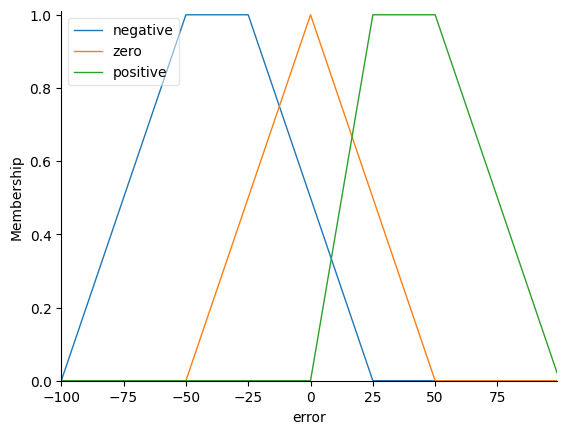

In [ ]:
# Define the error antecedent
error = ctrl.Antecedent(np.arange(-100, 100, 1), 'error')
error['negative'] = fuzz.trapmf(error.universe, [-100, -50, -25,25])
error['zero'] = fuzz.trimf(error.universe, [-50, 0, 50])
error['positive'] = fuzz.trapmf(error.universe, [0,25,50,100])
error.view()

### **PASO 2. Variable de salida**

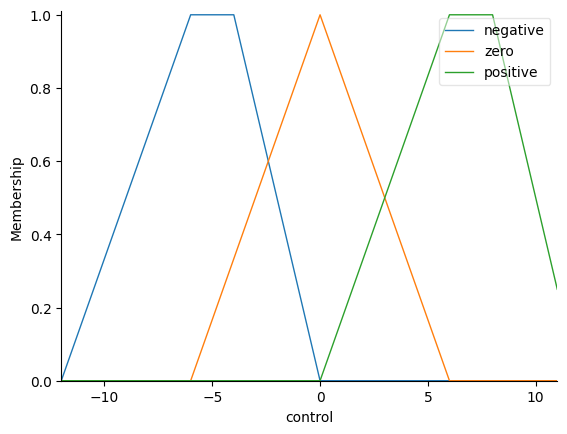

In [ ]:
# Define the control consequent
control = ctrl.Consequent(np.arange(-12, 12, 1), 'control')
control['negative'] = fuzz.trapmf(control.universe, [-12, -6, -4,0])
control['zero'] = fuzz.trimf(control.universe, [-6, 0, 6])
control['positive'] = fuzz.trapmf(control.universe, [0,6,8,12])
control.view()


### **PASO 3. Inferencia**

In [ ]:
# Define the rules
rule1 = ctrl.Rule(error['negative'], control['negative'])
rule2 = ctrl.Rule(error['zero'], control['zero'])
rule3 = ctrl.Rule(error['positive'], control['positive'])

In [ ]:
control_sys = ctrl.ControlSystem([rule1,rule2,rule3])
control_sim = ctrl.ControlSystemSimulation(control_sys)

### **PASO 4. Evaluar/SImular en un punto**

Salida defuzzificada = 4.1935807781961625
Salida defuzzificada  redondeada= 4.19


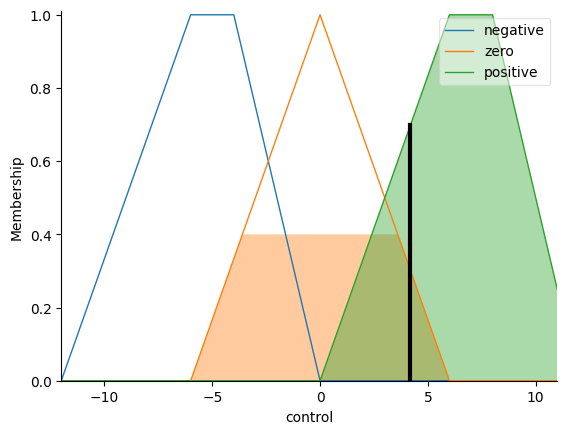

In [ ]:
control_sim.input['error'] = 30
control_sim.compute()
control.view(sim=control_sim)
print("Salida defuzzificada =", control_sim.output['control'])
print("Salida defuzzificada  redondeada=", round(control_sim.output['control'],2))

### **Paso 5. Gráfica de salida - Contorno**

In [ ]:
error_values = np.linspace(-100,100,2001)
out = np.zeros_like(error_values)
n = error_values.size

In [ ]:
for i in range(n):
  control_sim.input['error'] = error_values[i]
  control_sim.compute()
  # Check if 'control' is in the output dictionary before accessing it
  if 'control' in control_sim.output:
    out[i] = control_sim.output['control']
  else:
    # Handle the case where 'control' is not in the output
    # Here, we are setting out[i] to 0, but you can choose a different strategy
    out[i] = 0
    #print(f"Warning: 'control' output not found for error_value = {error_values[i]}")

Text(0, 0.5, 'acción de control [V]')

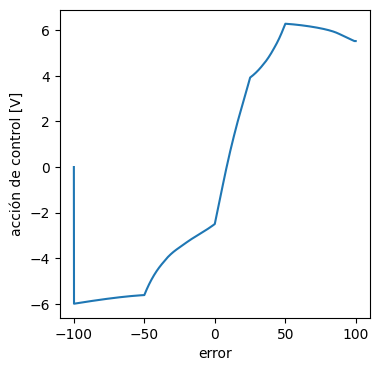

In [ ]:
fig = plt.figure(figsize=(4, 4))
plt.plot(error_values,out)
plt.xlabel('error')
plt.ylabel('acción de control [V]')

### **Paso 6. Conclusiones y Interpretacion**

Se ajusto los antecedentes y Consecuencias de tal manera que la accion de Control Fuera mucho mas proporcional y tuviera un comportamiento mas lineal en el rango de -50 a 50 de la entrada.
Ademas de esto la simulacion en un Punto tambien mostro mejoraria al distribuir de mejor manera los antecedentes en la zona.

Salida defuzzificada = 4.1935807781961625
Salida defuzzificada  redondeada= 4.19


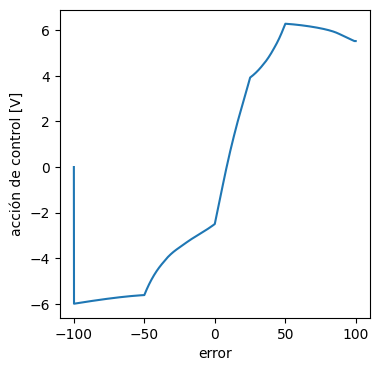

In [ ]:
# prompt: Diseñar un control proporcional para una entrada (error) y una salida(acción de control)
# Variable de entrada (input)- Antecedente
# error
# ¿Qué tan grande es el error?
# Conjunto término: [Negativo, Cero, Positivo]
# Universo: el universo de esta variable se define en [-100,100] %
# Variable de salida (output)- Consecuencia
# control
# La acción de control se define como una tensión de máximo 12 V ¿Cuál es el valor de la acción de control?
# Conjunto término: [Negativo, Cero, Positivo]
# Universo: el universo de esta variable se define en [-12,12] %
# Reglas
# SI El error es negativo ENTONCES La acción de control es negativa
# SI El error es cero ENTONCES La acción de control es cero
# SI El error es positivo ENTONCES La acción de control es positivo

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# ### **PASO 1. Variable de entrada**
# Define the error antecedent
error = ctrl.Antecedent(np.arange(-100, 100, 1), 'error')
error['negative'] = fuzz.trapmf(error.universe, [-100, -50, -25, 25])
error['zero'] = fuzz.trimf(error.universe, [-50, 0, 50])
error['positive'] = fuzz.trapmf(error.universe, [0, 25, 50, 100])
# error.view()

# ### **PASO 2. Variable de salida**
# Define the control consequent
control = ctrl.Consequent(np.arange(-12, 12, 1), 'control')
control['negative'] = fuzz.trapmf(control.universe, [-12, -6, -4, 0])
control['zero'] = fuzz.trimf(control.universe, [-6, 0, 6])
control['positive'] = fuzz.trapmf(control.universe, [0, 6, 8, 12])
# control.view()

# ### **PASO 3. Inferencia**
# Define the rules
rule1 = ctrl.Rule(error['negative'], control['negative'])
rule2 = ctrl.Rule(error['zero'], control['zero'])
rule3 = ctrl.Rule(error['positive'], control['positive'])
control_sys = ctrl.ControlSystem([rule1, rule2, rule3])
control_sim = ctrl.ControlSystemSimulation(control_sys)

# ### **PASO 4. Evaluar/SImular en un punto**
control_sim.input['error'] = 30
control_sim.compute()
# control.view(sim=control_sim)
print("Salida defuzzificada =", control_sim.output['control'])
print("Salida defuzzificada  redondeada=", round(control_sim.output['control'], 2))

# ### **Paso 5. Gráfica de salida - Contorno**
error_values = np.linspace(-100, 100, 2001)
out = np.zeros_like(error_values)
n = error_values.size
for i in range(n):
  control_sim.input['error'] = error_values[i]
  control_sim.compute()
  # Check if 'control' is in the output dictionary before accessing it
  if 'control' in control_sim.output:
    out[i] = control_sim.output['control']
  else:
    # Handle the case where 'control' is not in the output
    # Here, we are setting out[i] to 0, but you can choose a different strategy
    out[i] = 0
    # print(f"Warning: 'control' output not found for error_value = {error_values[i]}")
fig = plt.figure(figsize=(4, 4))
plt.plot(error_values, out)
plt.xlabel('error')
plt.ylabel('acción de control [V]')
plt.show()
# ### **Paso 6. Conclusiones y Interpretacion**
# Se ajusto los antecedentes y Consecuencias de tal manera que la accion de Control Fuera mucho mas proporcional y tuviera un comportamiento mas lineal en el rango de -50 a 50 de la entrada.
# Ademas de esto la simulacion en un Punto tambien mostro mejoraria al distribuir de mejor manera los antecedentes en la zona.